In [1]:
# This notebook will generate additional random testing data for further training of the algorithm

'''
parameters to care about:
    
    background: grey/white
    grid: yes/no
    number of displayed features (1-4)
    shapes used for features
    color used for features
    title/subtitle
    legend (yes/no) / legend_has_title (yes/no)
    axis text
    rotation
    pollution
''';

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as tra
from matplotlib import font_manager as fm
import io
import random
from PIL import Image
from random_word import RandomWords
import os
import cv2
import string

In [5]:
r = RandomWords()

def random_word_list(length):
    single_letter_threshold = random.randint(0,length-1)
    result = []
    for i in range (0,single_letter_threshold):
        result.append(random.choices(string.ascii_uppercase + string.ascii_lowercase)[0])
    
    for i in range(single_letter_threshold, length):
        result.append(r.get_random_word())
    return result

def list_to_string(lst):
    if lst is None:
        return ''
    else:
        return ' '.join(lst)

In [6]:
def noisy(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [61]:
def draw_random_graph(number_of_graphs):
    legend_data = pd.DataFrame(columns=['sample_name', 'legend'])

    for graphs_created in range(number_of_graphs):
        markers = [".", "o", "v", "^", "s", "p", "*", "d", "X", "+", ">"]
        random.shuffle(markers)

        legend_length = random.randint(1,4)
        legend_text = random_word_list(legend_length)


        data_1 = random.choice([-1, 1, 1, 1]) * np.random.randn(random.randint(20,50),2)*random.randint(-50,50)
        data_2 = np.random.randint(random.randint(-50,0), random.randint(1,100), size=(random.randint(20,50),2))
        data_3 = np.random.rand(random.randint(20,50),2)*random.randint(-100,100)
        x = random.randint(-10,10) * np.linspace(-5.0, 5.0, 50)
        y = random.randint(1,10) + np.linspace(-5.0, 5.0, 50)
        data_4 = np.stack((x,y), axis=1)

        all_data = [data_1, data_2, data_3, data_4]
        random.shuffle(all_data)

        fig, ax = plt.subplots()

        font = fm.FontProperties(family= random.choice(['Comic Sans MS', 'MS Gothic', 'SimSun', 'Impact', 'Brush Script MT', 'Cambria', 'Lucida Console']),
                            weight=random.choice(['bold', 'normal']),
                            style='normal', size=30)

        font_2 = fm.FontProperties(family= random.choice(['Comic Sans MS', 'MS Gothic', 'SimSun', 'Impact', 'Brush Script MT', 'Cambria', 'Lucida Console']),
                    weight=random.choice(['bold', 'normal']),
                    style='normal', size=16)

        plt.suptitle(list_to_string(random_word_list(random.randint(1,2))), y=1.15, x=0.5, fontproperties=font)
        plt.title(list_to_string(random_word_list(random.randint(1,4))), y=1.02, x=0.49, fontproperties=font_2)
        plt.ylabel(r.get_random_word(), fontsize=10)
        plt.xlabel(r.get_random_word(), fontsize=10)
        plt.grid(random.choice([True, False]))

        fig.set_size_inches(8, 3.2)
        plt.rcParams['figure.facecolor'] = random.choice(['white', 'white', 'white', 'grey'])



        for i in range(legend_length):
            ax.scatter(all_data[i][:,0], all_data[i][:,1], marker = markers[i], s=random.randint(80, 200),  label = legend_text[i])
            ax.set_facecolor(random.choice(['white', 'white', 'white', 'grey']))

        if (random.choice([True, True, True, True, True, True, True, True, True, True, True, True, False])):
            legend = ax.legend(loc=random.randint(0,9), title= random.choice([r.get_random_word(), False]), fontsize = 7, title_fontsize = 7, markerscale = 0.5)
            frame = legend.get_frame()
            frame.set_facecolor(random.choice(['white', 'grey', 'lightgrey', 'lightgrey']))
            frame.set_edgecolor(random.choice(['white', 'grey', 'darkgrey']))
####
        buffer = io.BytesIO()
        plt.savefig(buffer, format='jpg', dpi=120, bbox_inches="tight")
        buffer.seek(0)


        white = (255,255,255)
        new_image = Image.new("RGB", (1024,512), white)

        plot_img =  Image.open(buffer)

        plot_img = plot_img.resize([random.randint(820,835),random.randint(410,430)])

        rotated_img = plot_img.rotate(random.randint(-4,4), expand = 1, fillcolor = white)

        new_image.paste(rotated_img, (60,20))

        new_image = np.asarray(new_image)
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
        noisy_image = noisy(new_image, random.uniform(0, 0.02))

        image_name = "graph" + str(graphs_created) + ".png"
        data_to_add = pd.DataFrame({'sample_name': image_name, 'legend': None}, index = [0])
        data_to_add.loc[0, 'legend'] = legend_text

        legend_data = pd.concat([legend_data, data_to_add])

        cv2.imwrite("generated_graphs/" + image_name, noisy_image)

    legend_data.to_csv('generated_graphs/generated_graph_legends.csv')
    return new_image


last_image = draw_random_graph(5000)



(836, 465)
(836, 465)
(822, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(843, 465)
(822, 465)
(836, 465)
(822, 465)
(836, 465)
(836, 465)
(850, 465)
(847, 465)
(836, 465)
(836, 465)
(836, 465)


C:\Users\schla\AppData\Local\Temp/ipykernel_19856/1361645990.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


(836, 465)
(847, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(847, 465)
(836, 465)
(825, 465)
(836, 465)
(822, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(822, 465)
(836, 465)
(836, 465)
(836, 465)
(822, 465)
(836, 465)
(836, 465)
(847, 465)
(822, 465)
(836, 465)
(822, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(825, 465)
(836, 465)
(822, 465)
(840, 465)
(836, 465)
(836, 465)
(851, 465)
(836, 465)
(836, 465)
(836, 465)
(822, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(838, 465)
(840, 465)
(822, 465)
(844, 465)
(836, 465)
(847, 465)
(836, 465)
(836, 465)
(836, 465)
(849, 465)
(836, 465)
(836, 465)
(836, 465)
(822, 465)
(836, 465)
(836, 465)
(836, 465)
(847, 465)
(836, 465)
(836, 465)
(822, 465)
(822, 465)
(836, 465)
(847, 465)
(836, 465)
(836, 465)
(836, 465)
(825, 465)
(836, 465)
(836, 465)
(822, 465)
(825, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)
(836, 465)

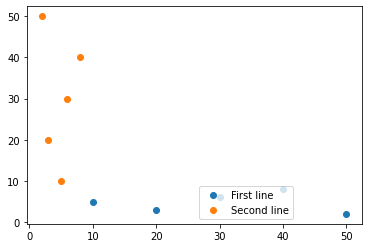

In [132]:
import cv2
label = np.array((0.5,0,0.5,0.5))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array([1,2,3,4,5])*10, [5,3,6,8,2])
ax.scatter([5,3,6,8,2], np.array([1,2,3,4,5])*10)
leg = ax.legend(['First line', 'Second line'], loc=3, bbox_to_anchor=label)
fig.savefig(r"temp\test.png")

In [133]:
img = cv2.imread(r"temp\test.png")

In [134]:
img.shape

(288, 432, 3)

In [164]:
x, y, w, h = leg.get_window_extent().bounds

y = img.shape[0] - y - h

In [167]:
x, y, w, h = int(x), int(y), int(w), int(h)
x, y, w, h

(226, 214, 93, 33)

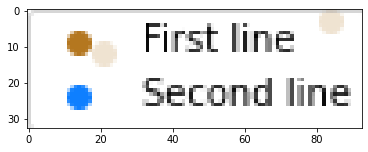

In [168]:
plt.imshow(img[y:y+h, x:x+w])